In [4]:
!pip install contractions
!pip install wordcloud
!pip install gradio
!pip install gensim


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   - -------------------------------------- 0.8/24.0 MB 8.5 MB/s eta 0:00:03
   ------- -------------------------------- 4.7/24.0 MB 15.0 MB/s eta 0:00:02
   ------------- -------------------------- 8.4/24.0 MB 16.3 MB/s eta 0:00:01
   ------------------ --------------------- 11.0/24.0 MB 17.2 MB/s eta 0:00:01
   -------------------- ------------------- 12.3/24.0 MB 13.5 MB/s eta 0:00:01
   --------------------- ------------------ 13.1/24.0 MB 11.4 MB/s eta 0:00:01
   ---------------------- ----------------- 13.6/24.0 MB 10.3 MB/s eta 0:00:02
   ----------------------- ---------------- 14.2/24.0 MB 9.5 MB/s eta 0:00:02
   ------------------------ --------------- 14.9/24.0 MB 8.5 MB/s eta 0:00:02
   -------------------------- ------------- 16.0/24.0 MB 7.9 MB/s eta 0:00:02
   --------------------------- ------------ 16.8/24.0 MB 8.1 MB/s eta 0:00:01
   ----------------------------- ---------- 17.8/24.0 MB 7.3 MB/s eta

  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense, Dropout
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
import contractions
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from gensim.models import word2vec
import gradio as gr
from tensorflow.keras.models import load_model
import pickle

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Text Preprocessing, Tokenization, and Sequence Padding

In [7]:
data = pd.read_csv("C:/Users/Admin/OneDrive/Desktop/College/SEM-6/AI_ML/1. Book Review Dataset-20250510T050100Z-001/1. Book Review Dataset/Book_review.csv", encoding="ISO-8859-1")
data.head()

,Unnamed: 0,rating,reviewText,summary
0,0,5,This book was the very first bookmobile book I...,50 + years ago...
1,1,1,"When I read the description for this book, I c...",Boring! Boring! Boring!
2,2,5,I just had to edit this review. This book is a...,Wiggleliscious/new toy ready/!!
3,3,5,I don't normally buy 'mystery' novels because ...,Very good read.
4,4,5,"This isn't the kind of book I normally read, a...",Great Story!


In [26]:
data_cleaning = data["reviewText"].dropna()
data = data.drop(columns=['Unnamed: 0'])

In [27]:
def lower_order(text):
    small_order_text = text.lower()
    return small_order_text

In [28]:
def remove_urls(text):
    url_pattern = re.compile(r'http\S+|www\S+|@\w+|#\w+|\d+')
    return url_pattern.sub(r'', text)

In [29]:
def handle_contractions(text):
    contraction_fixed_text = contractions.fix(text)
    return contraction_fixed_text

In [30]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r' ', string)

In [31]:
def remove_punct(text):
    tokenizer = RegexpTokenizer(r"\w+")
    tokens = tokenizer.tokenize(text)
    return ' '.join(tokens)

In [32]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text_tokens):
    result_tokens = []
    for token in text_tokens:
        if token not in stop_words:
            result_tokens.append(token)
    return result_tokens

In [33]:
def lemmatization(token_text):
    lemma_tokens = []
    wordnet = WordNetLemmatizer()
    lemmatized_tokens = [wordnet.lemmatize(token, pos = 'v') for token in token_text]
    return lemmatized_tokens

In [34]:
def text_cleaning_pipeline(dataset):
    # Convert the input to lower order.
    data = lower_order(dataset)
    
    # Remove URLs
    data = remove_urls(data)

    #Handle Contractions
    data = handle_contractions(data)
    
    # Remove emojis
    data = remove_emoji(data)
  
    # Remove punctuations.
    data = remove_punct(data)
  
    # Create tokens.
    tokens = data.split()
  
    # Remove stopwords:
    tokens = remove_stopwords(tokens)

    #Lemmatize words:
    tokens = lemmatization(tokens)

    return " ".join(tokens)

In [35]:
sample = "Hello @deeya 👋🏾, I still want us to hit that new sushi spot??? LMK when you're free cuz I can't go this or next weekend since I'll be swimming!!! #sushiBros #rawFish #🍱"
print(text_cleaning_pipeline(sample))

hello still want us hit new sushi spot lmk free cuz cannot go next weekend since swim


In [36]:
test = data["reviewText"][0]
print(text_cleaning_pipeline(test))

book first bookmobile book buy school book club love story bet dollar donut love memory serve buy book th grade would look forward relive memories


In [37]:
cleaned_tokens = data["reviewText"].apply(lambda dataset: text_cleaning_pipeline(dataset))

In [38]:
data['cleaned_text'] = data['reviewText'].apply(lambda dataset: text_cleaning_pipeline(dataset))

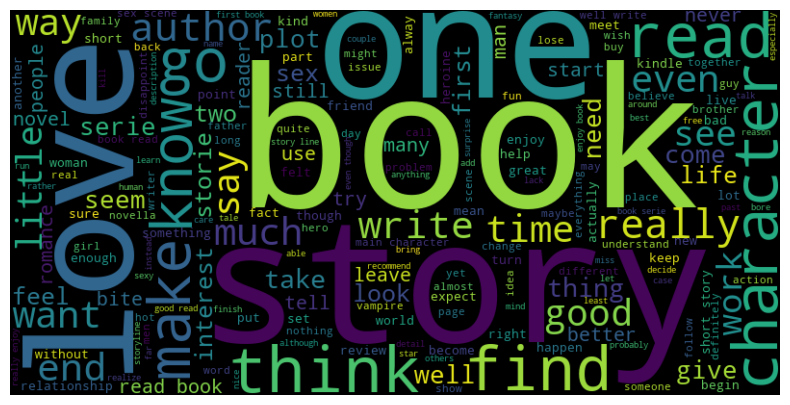

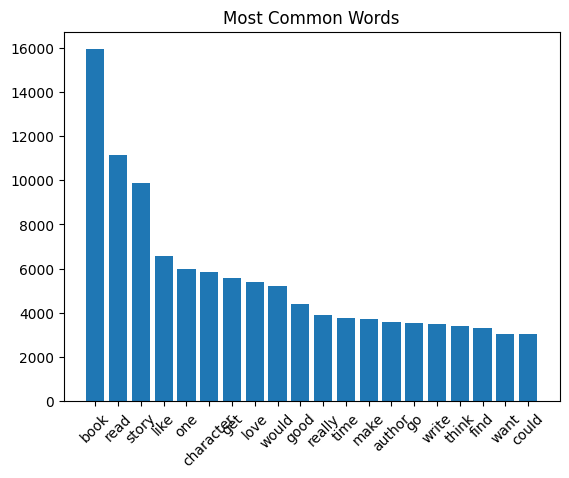

In [39]:
all_words = ' '.join(data['cleaned_text'])
wordcloud = WordCloud(width=800, height=400).generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

word_freq = Counter(all_words.split())
common_words = word_freq.most_common(20)

plt.bar(*zip(*common_words))
plt.title('Most Common Words')
plt.xticks(rotation=45)
plt.show()

In [40]:
print(data.columns)

Index(['rating', 'reviewText', 'summary', 'cleaned_text'], dtype='object')


In [42]:
X = data['cleaned_text'].values
y = data['rating'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

vocab_size = len(tokenizer.word_index) + 1

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Percentile-based padding
lengths = [len(seq) for seq in X_train_seq]
max_len = int(np.percentile(lengths, 95))

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Initialize and fit LabelEncoder
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

# Now use to_categorical
y_train_encoded = to_categorical(y_train_enc)
y_test_encoded = to_categorical(y_test_enc)

# Vocabulary size
vocab_size = len(tokenizer.word_index) + 1

In [43]:
model1 = Sequential()
model1.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len))
model1.add(SimpleRNN(units=64, return_sequences=False))
model1.add(Dense(units=y_train_encoded.shape[1], activation='softmax'))

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [44]:
model2 = Sequential()
model2.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len))
model2.add(LSTM(units=64, return_sequences=False))
model2.add(Dense(units=y_train_encoded.shape[1], activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
embedding_dim = 300
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in w2v_model:
        embedding_matrix[i] = w2v_model[word]

model3 = Sequential()
model3.add(Embedding(input_dim=vocab_size,
                     output_dim=embedding_dim,
                     input_length=max_len,
                     weights=[embedding_matrix],
                     trainable=False))  # freeze embeddings
model3.add(LSTM(units=64, return_sequences=False))
model3.add(Dense(units=y_train_encoded.shape[1], activation='softmax'))

model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])